# NFT Hackathon
## Author: Kishan Narotam

This notebook contains the Python analysis done for the NFT Hackathon challenge as posed by Avery Smith through Data Career Jumpstart

The purpose of this notebook:
- Analyse the given data set
- Create a dashboard from the set
- Present findings of the data
- Practice my skils

## Import the libraries

In [112]:
## Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Import the data set

For this analysis I will use the Veefriends data set.

Veefriends is Gary Veynerchuk NFT's collection, specifically this data set is of the transactions seen in the OpenSea

In [113]:
df = pd.read_csv("../Data/veefriends.csv")
display(df.head())
display(df.dtypes)
display(df.shape)

,Unnamed: 0,date,asset_id,from_address,to_address,transaction_hash,type,sale_price_eth,sale_price_usd,name,rarity_attribute,Editions_attribute,overall_rarity_score,category_attribute,benefit_attribute,group_attribute,adjective_attribute,animal_attribute,url
0,0,2021-05-12,6023,0x241cb9ab81cb44088a1705272729fe87d79b124d,0x4bbbd042b98ca55c07c588f6a8258dd89ac46f8c,0x0ef82a6de8812de323d4af8c252fe30d11ad57ec2af1...,transfers,NaN,NaN,Logical Lion,Spectacular,1 of 1,5304.537243,Mammal,NaN,Admission,Logical,Lion,www.opensea.io/assets/0xa3aee8bce55beea1951ef8...
1,1,2021-05-12,2766,0x8ad272ac86c6c88683d9a60eb8ed57e6c304bb0c,0x2eb9b439ffb7dc587198e1534e465a6242192b24,0x5beb3e00fb2e87ae7bbce2c16fd8ce8e29aa0c30bcf9...,transfers,NaN,NaN,Eager Eagle,Spectacular,1 of 1,21899.067819,Bird,NaN,Admission,Eager,Eagle,www.opensea.io/assets/0xa3aee8bce55beea1951ef8...
2,2,2021-05-12,6569,0x436af8dfc3b0296f79eecc67a8af9342e83289fc,0xfb4604f1bf9e1f9a1a9a83537fd8f7efd55868d7,0x101a2fb496c56f6a4f634b79a87bde534b87d6cba04a...,transfers,NaN,NaN,Motivated Monster,Very Rare,1 of 5,21972.857610,Creature,NaN,Admission,Motivated,Monster,www.opensea.io/assets/0xa3aee8bce55beea1951ef8...
3,3,2021-05-12,5859,0xc79499ed6647f189810854623cf0c478bfeb0583,0x81a0578c16ec390924ce0bd9c38756a619f8e472,0x4e516d888ed5272917ffd5c64ad81a0c0c444b630e4b...,transfers,NaN,NaN,Legit Llama,Spectacular,1 of 1,26232.523102,Mammal,NaN,Admission,Legit,Llama,www.opensea.io/assets/0xa3aee8bce55beea1951ef8...
4,4,2021-05-12,6912,0x8cb9a563c688677e7303c56e1239de1a03ceba8c,0xe809f6ce53880d82ba44dfd92c4e79902db37524,0x3e330d510693367bb04c2387e0d9224e7ec4d67fb591...,transfers,NaN,NaN,Passionate Parrot,Very Rare,1 of 5,26201.639943,Bird,NaN,Admission,Passionate,Parrot,www.opensea.io/assets/0xa3aee8bce55beea1951ef8...


Unnamed: 0                int64
date                     object
asset_id                  int64
from_address             object
to_address               object
transaction_hash         object
type                     object
sale_price_eth          float64
sale_price_usd          float64
name                     object
rarity_attribute         object
Editions_attribute       object
overall_rarity_score    float64
category_attribute       object
benefit_attribute        object
group_attribute          object
adjective_attribute      object
animal_attribute         object
url                      object
dtype: object

(16283, 19)

Before I list the data dictionary I have defined based on this information, it must be noted that this data provided was already cleaned to some extent.

## Pre-processing

Cleaning the data, sorting out the variable types, etc.

First let's drop the first column, as that is just replicating the indexing of the dataframe.

In [114]:
df.drop(df.columns [0], axis='columns', inplace = True)
df.head()

,date,asset_id,from_address,to_address,transaction_hash,type,sale_price_eth,sale_price_usd,name,rarity_attribute,Editions_attribute,overall_rarity_score,category_attribute,benefit_attribute,group_attribute,adjective_attribute,animal_attribute,url
0,2021-05-12,6023,0x241cb9ab81cb44088a1705272729fe87d79b124d,0x4bbbd042b98ca55c07c588f6a8258dd89ac46f8c,0x0ef82a6de8812de323d4af8c252fe30d11ad57ec2af1...,transfers,NaN,NaN,Logical Lion,Spectacular,1 of 1,5304.537243,Mammal,NaN,Admission,Logical,Lion,www.opensea.io/assets/0xa3aee8bce55beea1951ef8...
1,2021-05-12,2766,0x8ad272ac86c6c88683d9a60eb8ed57e6c304bb0c,0x2eb9b439ffb7dc587198e1534e465a6242192b24,0x5beb3e00fb2e87ae7bbce2c16fd8ce8e29aa0c30bcf9...,transfers,NaN,NaN,Eager Eagle,Spectacular,1 of 1,21899.067819,Bird,NaN,Admission,Eager,Eagle,www.opensea.io/assets/0xa3aee8bce55beea1951ef8...
2,2021-05-12,6569,0x436af8dfc3b0296f79eecc67a8af9342e83289fc,0xfb4604f1bf9e1f9a1a9a83537fd8f7efd55868d7,0x101a2fb496c56f6a4f634b79a87bde534b87d6cba04a...,transfers,NaN,NaN,Motivated Monster,Very Rare,1 of 5,21972.857610,Creature,NaN,Admission,Motivated,Monster,www.opensea.io/assets/0xa3aee8bce55beea1951ef8...
3,2021-05-12,5859,0xc79499ed6647f189810854623cf0c478bfeb0583,0x81a0578c16ec390924ce0bd9c38756a619f8e472,0x4e516d888ed5272917ffd5c64ad81a0c0c444b630e4b...,transfers,NaN,NaN,Legit Llama,Spectacular,1 of 1,26232.523102,Mammal,NaN,Admission,Legit,Llama,www.opensea.io/assets/0xa3aee8bce55beea1951ef8...
4,2021-05-12,6912,0x8cb9a563c688677e7303c56e1239de1a03ceba8c,0xe809f6ce53880d82ba44dfd92c4e79902db37524,0x3e330d510693367bb04c2387e0d9224e7ec4d67fb591...,transfers,NaN,NaN,Passionate Parrot,Very Rare,1 of 5,26201.639943,Bird,NaN,Admission,Passionate,Parrot,www.opensea.io/assets/0xa3aee8bce55beea1951ef8...


Let's convert the date column into a datetime format.

The reason for doing this is to get the earliest and the latest date range. This will form a filter for the future dashboard and analysis.

In [115]:
df['date'] = pd.to_datetime(df['date'])
print("Date range: ", df['date'].min(), " - ", df['date'].max())

Date range:  2021-05-12 00:00:00  -  2022-03-22 00:00:00


So given some pre analysis on the data, I've identified some rows and data that needs to be amended, but for the sake of clarity let me show exactly how I figured that out.

Let's check some of the important columns and ensure that I have all the info, keeping in mind the end goal of a dashboard.

Let's do a sanity check on some columns and ensure all data is present.

In [116]:
df['asset_id'].isnull().sum()

0

In [117]:
df['from_address'].isnull().sum()

0

In [118]:
df['to_address'].isnull().sum()

0

In [119]:
df['transaction_hash'].isnull().sum()

0

In [120]:
df['type'].isnull().sum()

0

In [121]:
df['adjective_attribute'].isna().sum()

2

Based on the columns a quick check saw that the adjective attribute column had 2 nulls which is odd to see.

In [122]:
df[df['adjective_attribute'].isna()]

,date,asset_id,from_address,to_address,transaction_hash,type,sale_price_eth,sale_price_usd,name,rarity_attribute,Editions_attribute,overall_rarity_score,category_attribute,benefit_attribute,group_attribute,adjective_attribute,animal_attribute,url
228,2021-05-23,525,0x2d3be1881c8fea9ba00e248cd73c4281321495f1,0x3cd3bf7db26df10ff229fe8f8650bb9f8d05f103,0x5e6dbb10b104a6bd86cadce8e7ed802763743ebec7e0...,sales,3.2376,7467.103512,NaN,Rare,1 of 1,23381.569335,Fish,NaN,Admission,NaN,Anchovy,www.opensea.io/assets/0xa3aee8bce55beea1951ef8...
231,2021-05-23,525,0x2d3be1881c8fea9ba00e248cd73c4281321495f1,0x3cd3bf7db26df10ff229fe8f8650bb9f8d05f103,0x5e6dbb10b104a6bd86cadce8e7ed802763743ebec7e0...,transfers,NaN,NaN,NaN,Rare,1 of 1,23381.569335,Fish,NaN,Admission,NaN,Anchovy,www.opensea.io/assets/0xa3aee8bce55beea1951ef8...


Ok so asset 525 is an Anchovy, and when checked online is technically an Amiable Anchovy.

So let's clean this up first.

In [123]:
df.loc[df['adjective_attribute'].isna(), 'adjective_attribute'] = 'Amiable'

In [124]:
display(df.loc[228])
display(df.loc[231])

date                                                  2021-05-23 00:00:00
asset_id                                                              525
from_address                   0x2d3be1881c8fea9ba00e248cd73c4281321495f1
to_address                     0x3cd3bf7db26df10ff229fe8f8650bb9f8d05f103
transaction_hash        0x5e6dbb10b104a6bd86cadce8e7ed802763743ebec7e0...
type                                                                sales
sale_price_eth                                                     3.2376
sale_price_usd                                                7467.103512
name                                                                  NaN
rarity_attribute                                                     Rare
Editions_attribute                                                 1 of 1
overall_rarity_score                                         23381.569335
category_attribute                                                   Fish
benefit_attribute                     

date                                                  2021-05-23 00:00:00
asset_id                                                              525
from_address                   0x2d3be1881c8fea9ba00e248cd73c4281321495f1
to_address                     0x3cd3bf7db26df10ff229fe8f8650bb9f8d05f103
transaction_hash        0x5e6dbb10b104a6bd86cadce8e7ed802763743ebec7e0...
type                                                            transfers
sale_price_eth                                                        NaN
sale_price_usd                                                        NaN
name                                                                  NaN
rarity_attribute                                                     Rare
Editions_attribute                                                 1 of 1
overall_rarity_score                                         23381.569335
category_attribute                                                   Fish
benefit_attribute                     

Great now that that is updated, let's compare it with other Amiable Anchovy NFTs

In [125]:
df_AA = df[(df['adjective_attribute'] == 'Amiable') & (df['animal_attribute'] == 'Anchovy')]
df_AA

,date,asset_id,from_address,to_address,transaction_hash,type,sale_price_eth,sale_price_usd,name,rarity_attribute,Editions_attribute,overall_rarity_score,category_attribute,benefit_attribute,group_attribute,adjective_attribute,animal_attribute,url
228,2021-05-23,525,0x2d3be1881c8fea9ba00e248cd73c4281321495f1,0x3cd3bf7db26df10ff229fe8f8650bb9f8d05f103,0x5e6dbb10b104a6bd86cadce8e7ed802763743ebec7e0...,sales,3.2376,7467.103512,NaN,Rare,1 of 1,23381.569335,Fish,NaN,Admission,Amiable,Anchovy,www.opensea.io/assets/0xa3aee8bce55beea1951ef8...
231,2021-05-23,525,0x2d3be1881c8fea9ba00e248cd73c4281321495f1,0x3cd3bf7db26df10ff229fe8f8650bb9f8d05f103,0x5e6dbb10b104a6bd86cadce8e7ed802763743ebec7e0...,transfers,NaN,NaN,NaN,Rare,1 of 1,23381.569335,Fish,NaN,Admission,Amiable,Anchovy,www.opensea.io/assets/0xa3aee8bce55beea1951ef8...
1346,2021-06-08,532,0x961d63a5c37afba739093cb32ec0993df007675b,0xb8d1c5d0b34c2335d56a954b91f8bd533a04c2fc,0x475cebd916141c5de9c4b9f51c02ad9b18c8543ff66e...,transfers,NaN,NaN,Amiable Anchovy,NaN,1 of 20,12292.137303,Fish,NaN,Admission,Amiable,Anchovy,www.opensea.io/assets/0xa3aee8bce55beea1951ef8...
1396,2021-06-08,532,0x961d63a5c37afba739093cb32ec0993df007675b,0xb8d1c5d0b34c2335d56a954b91f8bd533a04c2fc,0x475cebd916141c5de9c4b9f51c02ad9b18c8543ff66e...,sales,3.2000,8257.728000,Amiable Anchovy,NaN,1 of 20,12292.137303,Fish,NaN,Admission,Amiable,Anchovy,www.opensea.io/assets/0xa3aee8bce55beea1951ef8...
1444,2021-06-09,528,0x71b5b11521a1fd3662b393d16aec1d9d50b200d3,0x3cd3bf7db26df10ff229fe8f8650bb9f8d05f103,0x4d4a4e648ea0f8328a609dc854461ce96004e5dbe302...,transfers,NaN,NaN,Amiable Anchovy,Rare,1 of 7,12585.436845,Fish,NaN,Admission,Amiable,Anchovy,www.opensea.io/assets/0xa3aee8bce55beea1951ef8...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14376,2022-02-01,552,0xa8b98632caade81d6194063b80a421f12c183bcb,0x18af9ca59a8044658cf96e9ad8b86fcfd641cf37,0xe79d825bdbf4d61a4c80aa84aaf5d83cde1ba3d8a0b6...,transfers,NaN,NaN,Amiable Anchovy,NaN,1 of 20,12906.110246,Fish,NaN,Admission,Amiable,Anchovy,www.opensea.io/assets/0xa3aee8bce55beea1951ef8...
14744,2022-02-14,541,0x1c19dd3e5d5730ccc2654f1d194c8370e78f39cb,0xc3fed190bf671ad5d92cd94932b1a2e17d047f2f,0x1dd44f349383b47d1bbb1901eecda000fb36bcf6b14b...,transfers,NaN,NaN,Amiable Anchovy,NaN,1 of 20,15982.610246,Fish,NaN,Admission,Amiable,Anchovy,www.opensea.io/assets/0xa3aee8bce55beea1951ef8...
14967,2022-02-20,549,0xe7d254965c04468b559cbd796ee9d13b14011aa3,0xca372665e11bf714074248fd12e0d49c8376fdd0,0x552fa09a0b58190a97b49531be070aea8e6c7668ca67...,transfers,NaN,NaN,Amiable Anchovy,NaN,1 of 20,15982.610246,Fish,NaN,Admission,Amiable,Anchovy,www.opensea.io/assets/0xa3aee8bce55beea1951ef8...
15185,2022-02-21,535,0xb476a3227cba4beaed884fa4eb496dfdbb1d6b5b,0x968034fead149ee5227f64941f1d47ef4ebe0b0c,0x4411e4b5d5f7168600a7ca0eac92ee87a802babdb575...,transfers,NaN,NaN,Amiable Anchovy,NaN,1 of 20,10834.233164,Fish,NaN,Admission,Amiable,Anchovy,www.opensea.io/assets/0xa3aee8bce55beea1951ef8...


In [126]:
# Let's see the unique values under the name
df_AA['name'].unique()

array([nan, 'Amiable Anchovy'], dtype=object)

Ok so looks like we need to update the name as well.

In [127]:
df.loc[df['name'].isna(), 'name'] = 'Amiable Anchovy'

In [128]:
df_AA = df[(df['adjective_attribute'] == 'Amiable') & (df['animal_attribute'] == 'Anchovy')]
df_AA
df_AA['name'].unique()

array(['Amiable Anchovy'], dtype=object)

## Updating type to Minting

Although the focus of this is more on the sales, and price of NFTs, understanding which of these NFTs were minted may or may not present some sort of insight.

Minting in this data set will be determined by seeing if the from_address equals the to_address.

In [134]:
df.loc[df['from_address'] == df['to_address']].count()

date                    33
asset_id                33
from_address            33
to_address              33
transaction_hash        33
type                    33
sale_price_eth           0
sale_price_usd           0
name                    33
rarity_attribute        14
Editions_attribute      33
overall_rarity_score    33
category_attribute      33
benefit_attribute        0
group_attribute         33
adjective_attribute     33
animal_attribute        31
url                     33
dtype: int64

In [135]:
# total of 33 mints, let's update those types
df.loc[df['from_address'] == df['to_address'], 'type'] = 'mint'

In [137]:
df.loc[df['type'] == 'mint']

,date,asset_id,from_address,to_address,transaction_hash,type,sale_price_eth,sale_price_usd,name,rarity_attribute,Editions_attribute,overall_rarity_score,category_attribute,benefit_attribute,group_attribute,adjective_attribute,animal_attribute,url
10,2021-05-13,3650,0x03970d9dd4c6845bacdd873854c6df37acb41e1d,0x03970d9dd4c6845bacdd873854c6df37acb41e1d,0x4a7464c872eff37c731f890b56a36305fecfa977c576...,mint,NaN,NaN,Gift Goat,NaN,1 of 555,20644.514350,Mammal,NaN,Gift,Gift,Goat,www.opensea.io/assets/0xa3aee8bce55beea1951ef8...
16,2021-05-13,981,0x381897fb384e69d32e27f784041f4e394073477e,0x381897fb384e69d32e27f784041f4e394073477e,0x8a0fb12ea21f618677f4dadb2089cd0478880af2fbd9...,mint,NaN,NaN,Amiable Anchovy,NaN,1 of 20,15713.476667,Just Art,NaN,Admission,Be The Bigger Person,NaN,www.opensea.io/assets/0xa3aee8bce55beea1951ef8...
595,2021-05-29,8752,0xba786f70225a6586ccc3b11017a46e15858d6d58,0xba786f70225a6586ccc3b11017a46e15858d6d58,0x6d62d531db256a2a904f55942ffc0b555e60d2621ab0...,mint,NaN,NaN,Sufficient Shrimp,Epic,1 of 2,21123.558342,Invertebrate,NaN,Admission,Sufficient,Shrimp,www.opensea.io/assets/0xa3aee8bce55beea1951ef8...
1787,2021-06-12,10058,0x1df228a8933a9f63a4be80ad9f701922a3eaec13,0x1df228a8933a9f63a4be80ad9f701922a3eaec13,0xdba21eef3f47d146a013830499092338a89126280588...,mint,NaN,NaN,Woke Walrus,Rare,1 of 8,21062.242914,Mammal,NaN,Admission,Woke,Walrus,www.opensea.io/assets/0xa3aee8bce55beea1951ef8...
1788,2021-06-12,9027,0x32dd5e2699adcf5d89412bbfddf4c55edf6b6b45,0x32dd5e2699adcf5d89412bbfddf4c55edf6b6b45,0xaae067b59e665e764391c5913fdef69f1446b8945695...,mint,NaN,NaN,Tenacious Turkey,NaN,1 of 20,20950.386473,Bird,NaN,Admission,Tenacious,Turkey,www.opensea.io/assets/0xa3aee8bce55beea1951ef8...
1935,2021-06-14,1881,0x28ebb057f382a1883089ada739e9e54b656ebf50,0x28ebb057f382a1883089ada739e9e54b656ebf50,0x1608e12a88ce58c10b78d294d67f7a3aed613ca7ef49...,mint,NaN,NaN,Common Sense Cow,Rare,1 of 8,24480.752279,Mammal,NaN,Admission,Common Sense,Cow,www.opensea.io/assets/0xa3aee8bce55beea1951ef8...
3332,2021-07-07,7472,0xb68d55d13aac662df990a2a741d3de3a0376522a,0xb68d55d13aac662df990a2a741d3de3a0376522a,0xde61b98f0466662f2bdb65b766954fca4cdd77266967...,mint,NaN,NaN,Practical Peacock,NaN,1 of 20,21087.564087,Bird,NaN,Admission,Practical,Peacock,www.opensea.io/assets/0xa3aee8bce55beea1951ef8...
4058,2021-07-21,7556,0xef134fc17bb070bf3d9043290bdc5fa8450a8ce6,0xef134fc17bb070bf3d9043290bdc5fa8450a8ce6,0x84ce97f012e29fc28f68ac8164569355e9157f05d97a...,mint,NaN,NaN,Productive Puffin,NaN,1 of 20,26215.064087,Bird,NaN,Admission,Productive,Puffin,www.opensea.io/assets/0xa3aee8bce55beea1951ef8...
4120,2021-07-23,5499,0x4e0e45a0687d530674a53c7de6a42e71d30f46f5,0x4e0e45a0687d530674a53c7de6a42e71d30f46f5,0xa6fc4c8e0f2554f55ca5abfed42b8383809474e0a4ed...,mint,NaN,NaN,Karma Kiwi,Rare,1 of 8,26191.543353,Bird,NaN,Admission,Karma,Kiwi,www.opensea.io/assets/0xa3aee8bce55beea1951ef8...
4519,2021-07-30,861,0xabe101a8cf5220e15d5417eed90fd9214f675417,0xabe101a8cf5220e15d5417eed90fd9214f675417,0xe95314b77f34f467b016cf9b11f223493215a3f0b315...,mint,NaN,NaN,Bad-Ass Bulldog,NaN,1 of 20,31337.365524,Mammal,NaN,Admission,Bad-Ass,Bulldog,www.opensea.io/assets/0xa3aee8bce55beea1951ef8...


# Analysis

With the data as clean as I would like (being cleaned already beforehand), I can begin the analysis.

In this analysis I include the price, open, high, low, volume traded, and change in price from the previous day of:
- Bitcoin
- Ethereum
- Chainlink
- Maker
- Uniswap
- Axie Infinity

The above data sets are pulled from _Investing.com_ and the reason that these specific cryptocurrencies are chosen are as follows:
- Bitcoin is the largest cryptocurrency in the world, and trends in it may dictate (typically have dictated) how the overall crypto market performs
- Ethereum, as the sales of the NFTs are in Ethereum, we are making the assumption that the transactions are all on the Ethereum blockchain
- Chainlink, Maker, Axie Infinity, and Uniswap are all Ethereum-based projects, so let's see if these are affected or have any correlation with the NFTs

In [170]:
# Bitcoin data
df_BTC = pd.read_csv("../Data/BTC.csv")

# first we convert the date column into a datetime for graphing
df_BTC['Date'] = pd.to_datetime(df_BTC['Date'])

# then convert all pricing, open, high, and low columns into floats.
# However since the values are stored as strings and commas separators, the str.replace function must be removed and then only can it be converted to a float
df_BTC['Price'] = df_BTC['Price'].str.replace(',', '').astype(float)
df_BTC['Open'] = df_BTC['Open'].str.replace(',', '').astype(float)
df_BTC['High'] = df_BTC['High'].str.replace(',', '').astype(float)
df_BTC['Low'] = df_BTC['Low'].str.replace(',', '').astype(float)

# since the volume is stored as a string M, K, and B, we use the lambda function and a dictionary to essentially reverse "numerize"
# Numerize is the python library used to convert floats into readable string formats
tens = {'K': 10e3, 'M': 10e6, 'B': 10e9}
df_BTC['Vol.'] = df_BTC['Vol.'].apply(lambda x: int(float(x[:-1])*tens[x[-1]]))

# drop the percentage change column as it won't serve a purpose in my analysis
df_BTC.drop(df_BTC.columns[len(df_BTC.columns)-1], axis=1, inplace=True)

print('Bitcoin Data')
display(df_BTC.head())
display(df_BTC.dtypes)
display(df_BTC.shape)


,Date,Price,Open,High,Low,Vol.
0,2022-03-22,42373.0,41022.0,43327.9,40893.0,5370599999
1,2022-03-21,41022.0,41282.0,41532.0,40530.0,4066200000
2,2022-03-20,41276.0,42241.0,42301.0,40922.0,3084500000
3,2022-03-19,42233.0,41768.0,42386.0,41529.6,2245900000
4,2022-03-18,41767.8,40914.6,42308.4,40234.8,23100000000


Date     datetime64[ns]
Price           float64
Open            float64
High            float64
Low             float64
Vol.              int64
dtype: object

(315, 6)

In [177]:
# Let's load all of the other data

# Ethereum data
df_ETH = pd.read_csv("../Data/ETH.csv")
df_ETH['Date'] = pd.to_datetime(df_ETH['Date'])
df_ETH['Price'] = df_ETH['Price'].str.replace(',', '').astype(float)
df_ETH['Open'] = df_ETH['Open'].str.replace(',', '').astype(float)
df_ETH['High'] = df_ETH['High'].str.replace(',', '').astype(float)
df_ETH['Low'] = df_ETH['Low'].str.replace(',', '').astype(float)
df_ETH['Vol.'] = df_ETH['Vol.'].apply(lambda x: int(float(x[:-1])*tens[x[-1]]))
df_ETH.drop(df_ETH.columns[len(df_ETH.columns)-1], axis=1, inplace=True)

print('Ethereum Data')
display(df_ETH.head())
display(df_ETH.dtypes)
display(df_ETH.shape)

# Axie data
df_AXS = pd.read_csv("../Data/AXS.csv")
df_AXS['Date'] = pd.to_datetime(df_AXS['Date'])
df_AXS['Price'] = df_AXS['Price'].astype(float)
df_AXS['Open'] = df_AXS['Open'].astype(float)
df_AXS['High'] = df_AXS['High'].astype(float)
df_AXS['Low'] = df_AXS['Low'].astype(float)
df_AXS['Vol.'] = df_AXS['Vol.'].apply(lambda x: int(float(x[:-1])*tens[x[-1]]))
df_AXS.drop(df_AXS.columns[len(df_AXS.columns)-1], axis=1, inplace=True)

print('Axie Data')
display(df_AXS.head())
display(df_AXS.dtypes)
display(df_AXS.shape)

# Link data
df_LINK = pd.read_csv("../Data/LINK.csv")
df_LINK['Date'] = pd.to_datetime(df_LINK['Date'])
df_LINK['Price'] = df_LINK['Price'].astype(float)
df_LINK['Open'] = df_LINK['Open'].astype(float)
df_LINK['High'] = df_LINK['High'].astype(float)
df_LINK['Low'] = df_LINK['Low'].astype(float)
df_LINK['Vol.'] = df_LINK['Vol.'].apply(lambda x: int(float(x[:-1])*tens[x[-1]]))
df_LINK.drop(df_LINK.columns[len(df_LINK.columns)-1], axis=1, inplace=True)

print('Link Data')
display(df_LINK.head())
display(df_LINK.dtypes)
display(df_LINK.shape)

# Maker data
df_MKR = pd.read_csv("../Data/MKR.csv")
df_MKR['Date'] = pd.to_datetime(df_MKR['Date'])
df_MKR['Price'] = df_MKR['Price'].str.replace(',', '').astype(float)
df_MKR['Open'] = df_MKR['Open'].str.replace(',', '').astype(float)
df_MKR['High'] = df_MKR['High'].str.replace(',', '').astype(float)
df_MKR['Low'] = df_MKR['Low'].str.replace(',', '').astype(float)
df_MKR['Vol.'] = df_MKR['Vol.'].apply(lambda x: int(float(x[:-1])*tens[x[-1]]))
df_MKR.drop(df_MKR.columns[len(df_MKR.columns)-1], axis=1, inplace=True)

print('Maker Data')
display(df_MKR.head())
display(df_MKR.dtypes)
display(df_MKR.shape)

# Uniswap data
df_UNI = pd.read_csv("../Data/UNI.csv")
df_UNI['Date'] = pd.to_datetime(df_UNI['Date'])
df_UNI['Price'] = df_UNI['Price'].astype(float)
df_UNI['Open'] = df_UNI['Open'].astype(float)
df_UNI['High'] = df_UNI['High'].astype(float)
df_UNI['Low'] = df_UNI['Low'].astype(float)
df_UNI['Vol.'] = df_UNI['Vol.'].apply(lambda x: int(float(x[:-1])*tens[x[-1]]))
df_UNI.drop(df_UNI.columns[len(df_UNI.columns)-1], axis=1, inplace=True)

print('Uniswap Data')
display(df_UNI.head())
display(df_UNI.dtypes)
display(df_UNI.shape)

Ethereum Data


,Date,Price,Open,High,Low,Vol.
0,2022-03-22,2969.64,2891.41,3048.32,2887.69,7164700
1,2022-03-21,2891.63,2861.66,2960.42,2830.38,5466100
2,2022-03-20,2861.69,2950.03,2962.19,2819.27,4361100
3,2022-03-19,2949.92,2939.76,2984.00,2895.30,3926400
4,2022-03-18,2939.76,2812.29,2983.11,2768.65,15900000000


Date     datetime64[ns]
Price           float64
Open            float64
High            float64
Low             float64
Vol.              int64
dtype: object

(315, 6)

Axie Data


,Date,Price,Open,High,Low,Vol.
0,2022-03-22,52.3815,50.1650,53.4518,49.7976,6735100
1,2022-03-21,50.1650,49.7999,51.9206,49.1895,4940000
2,2022-03-20,49.7999,52.0784,52.4631,49.1821,4452400
3,2022-03-19,52.0784,50.4700,54.3600,50.2200,6183300
4,2022-03-18,50.4500,50.2400,51.4400,48.5300,225600000


Date     datetime64[ns]
Price           float64
Open            float64
High            float64
Low             float64
Vol.              int64
dtype: object

(315, 6)

Link Data


,Date,Price,Open,High,Low,Vol.
0,2022-03-22,15.44,14.99,15.84,14.99,48900000
1,2022-03-21,14.99,14.54,15.26,14.31,40900000
2,2022-03-20,14.54,15.01,15.11,14.44,31000000
3,2022-03-19,15.01,15.01,15.38,14.84,36200000
4,2022-03-18,15.01,14.40,15.25,14.12,657400000


Date     datetime64[ns]
Price           float64
Open            float64
High            float64
Low             float64
Vol.              int64
dtype: object

(315, 6)

Maker Data


,Date,Price,Open,High,Low,Vol.
0,2022-03-22,2038.16,1997.45,2099.73,1992.36,26700
1,2022-03-21,1997.63,1990.20,2043.58,1960.95,25800
2,2022-03-20,1990.70,2059.59,2107.48,1975.21,24900
3,2022-03-19,2060.94,2034.42,2092.15,2033.07,28800
4,2022-03-18,2034.59,2059.00,2096.06,2031.02,38800


Date     datetime64[ns]
Price           float64
Open            float64
High            float64
Low             float64
Vol.              int64
dtype: object

(315, 6)

Uniswap Data


,Date,Price,Open,High,Low,Vol.
0,2022-03-22,9.7499,9.3413,10.1584,9.2706,33700000
1,2022-03-21,9.3411,9.3290,9.6089,9.1715,26000000
2,2022-03-20,9.3206,9.7393,9.7794,9.1393,21900000
3,2022-03-19,9.7393,9.6300,9.9597,9.5799,38800000
4,2022-03-18,9.6301,9.2103,9.7503,9.0101,193200000


Date     datetime64[ns]
Price           float64
Open            float64
High            float64
Low             float64
Vol.              int64
dtype: object

(190, 6)

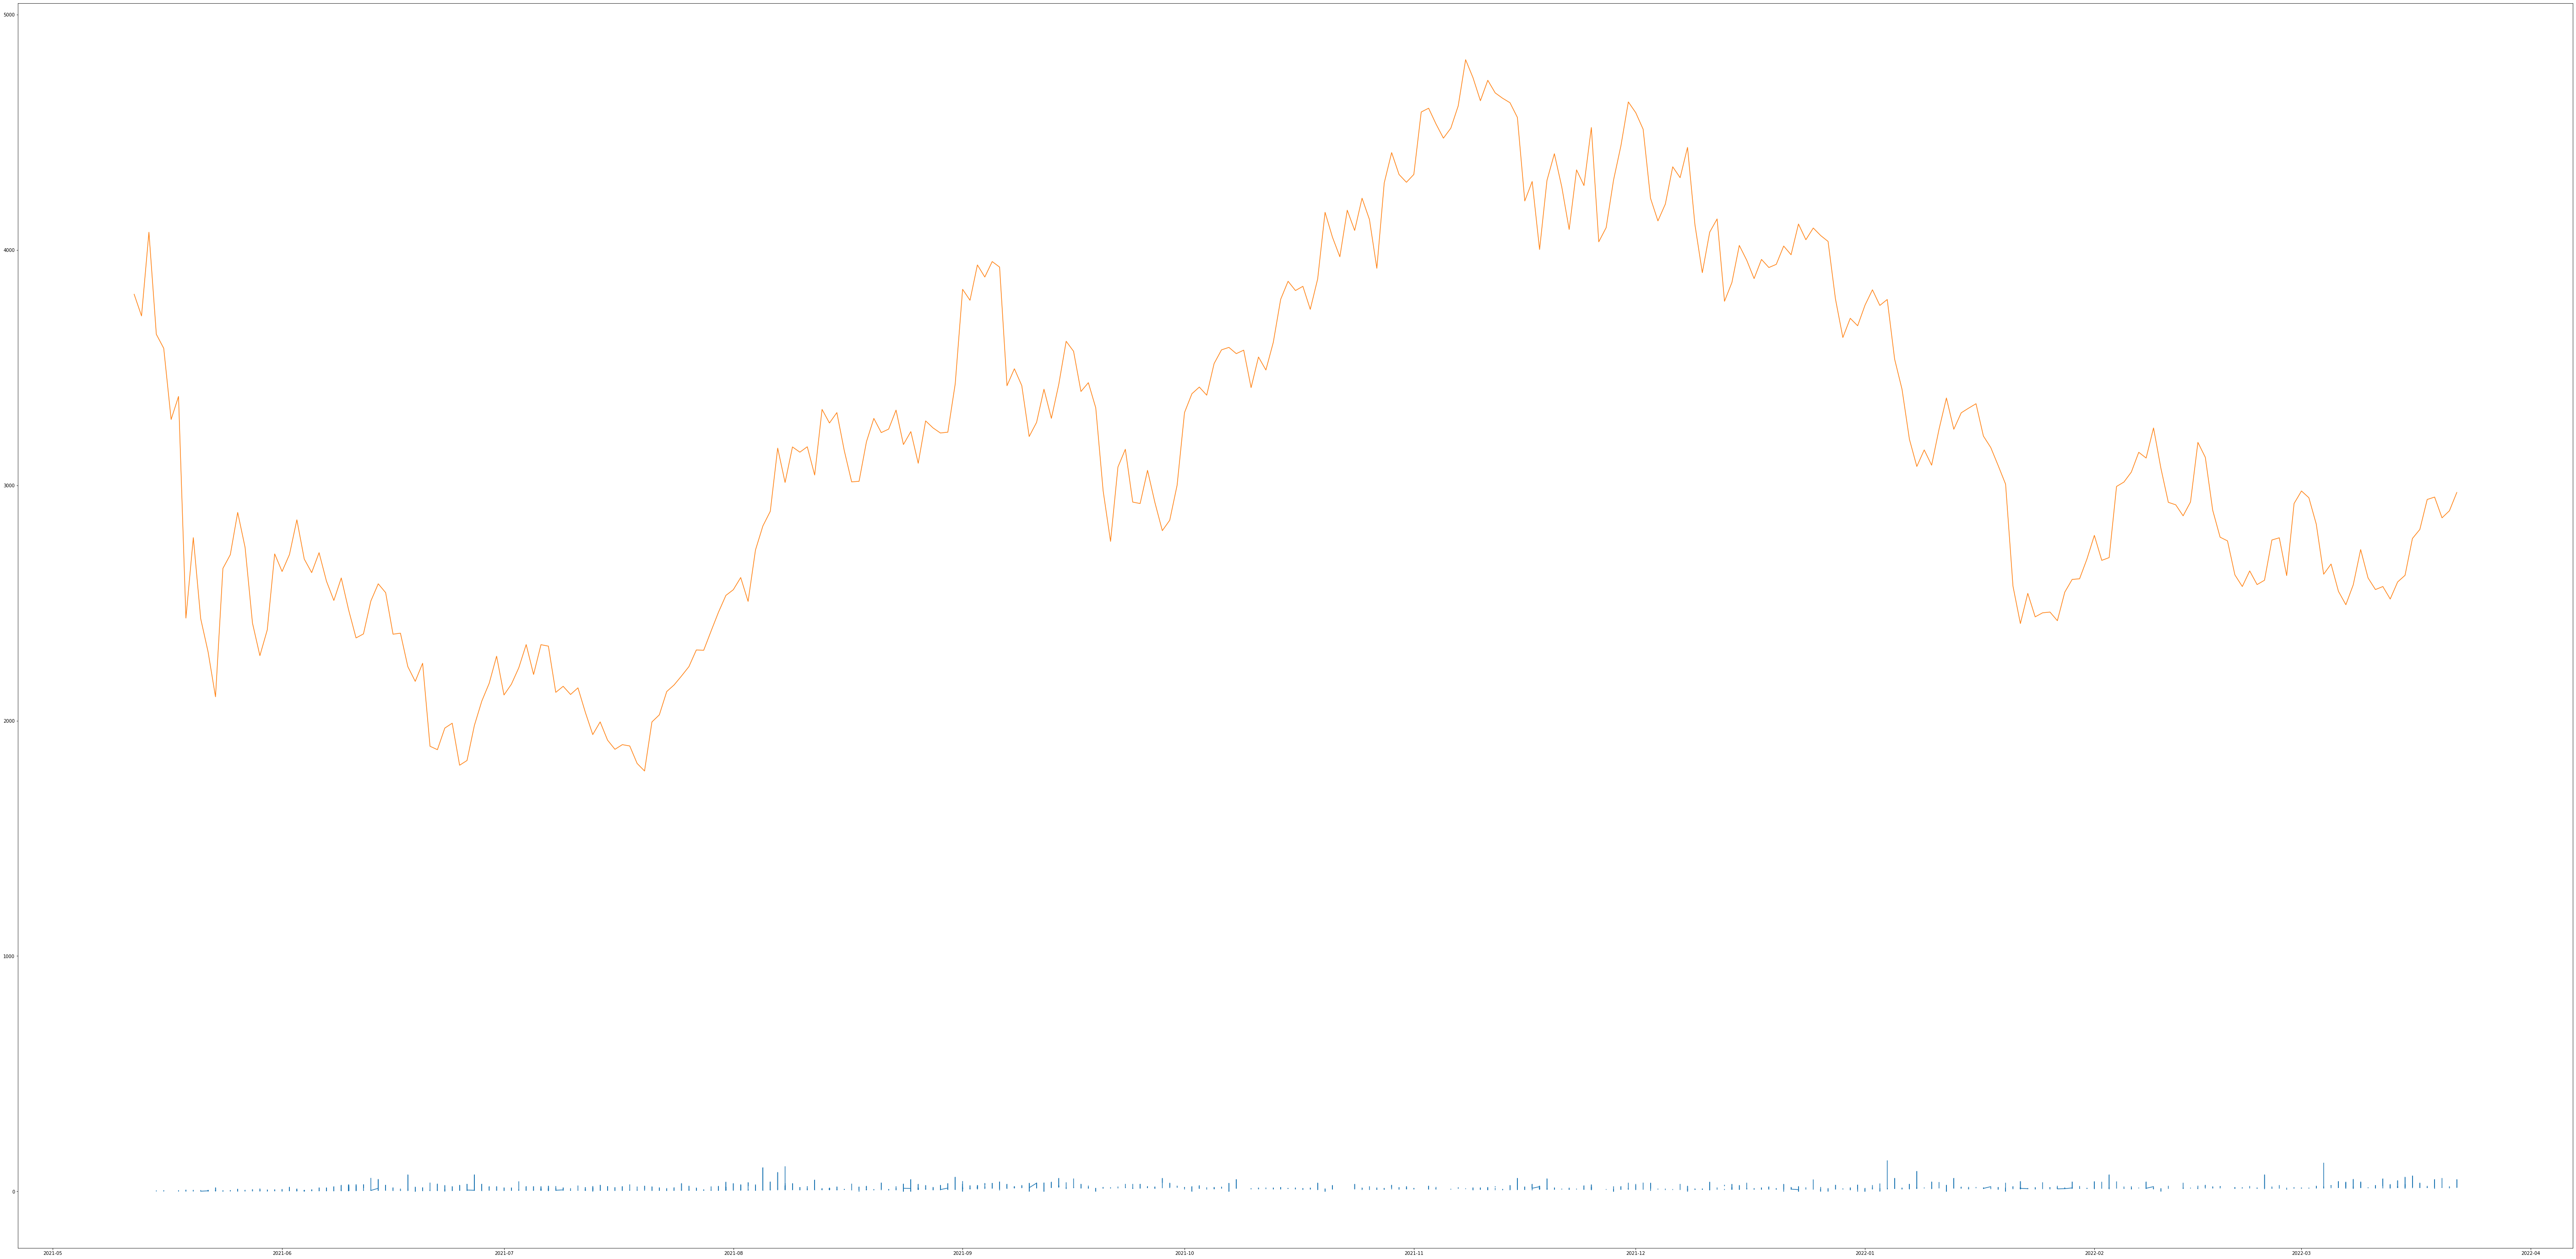

In [198]:
plt.figure(figsize=(100,50))
plt.plot(df['date'], df['sale_price_eth'])
plt.plot(df_ETH['Date'], df_ETH['Price'])
plt.show()